In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
# import this 1. Inputs/Listings Data/2020,2021 listings/listings  with room char 12-2021.csv

listings_2022 = pd.read_csv('../../../../1. Inputs/Listings Data/2022/london_listing.csv')

In [15]:
print(listings_2022.shape)

(66641, 74)


In [4]:
# keep only room_type = Entire home/apt
entire_home_2022 = listings_2022[listings_2022['room_type'] == 'Entire home/apt']

In [5]:
print(entire_home_2022.shape)

(37472, 74)


In [6]:
37472/66641

0.5622964841463963

In [7]:
# keep only the columns from entire_home (id, name, description, neighbourhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,calculated_host_listings_count_entire_homes,neighbourhood_cleansed,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm, review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month)
columns_to_keep = ['id', 'name', 'description', 'neighborhood_overview', 'host_response_time', 'host_response_rate', 'host_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']

entire_home_2022 = entire_home_2022[columns_to_keep]

In [8]:
print(entire_home_2022.isnull().sum())  

id                                 0
name                               6
description                      985
neighborhood_overview          13306
host_response_time             17768
host_response_rate             17768
host_listings_count               20
host_verifications                20
host_identity_verified            20
neighbourhood_cleansed             0
latitude                           0
longitude                          0
accommodates                       0
bathrooms_text                    19
bedrooms                        3119
beds                            1386
amenities                          0
price                              0
minimum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
review_scores_rating            9370
review_scores_accuracy          9936
r

In [9]:
# drop columns review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value and reviews_per_month and host_response_rate and host_response_time and neighborhood_overview
entire_home_2022 = entire_home_2022.drop(columns=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'host_response_rate', 'host_response_time', 'neighborhood_overview'])

In [10]:
print(entire_home_2022.isnull().sum())

id                           0
name                         6
description                985
host_listings_count         20
host_verifications          20
host_identity_verified      20
neighbourhood_cleansed       0
latitude                     0
longitude                    0
accommodates                 0
bathrooms_text              19
bedrooms                  3119
beds                      1386
amenities                    0
price                        0
minimum_nights               0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews            0
number_of_reviews_ltm        0
instant_bookable             0
dtype: int64


Total number of rows: 37472
Missing values per column (absolute count):
name                         6
description                985
host_listings_count         20
host_verifications          20
host_identity_verified      20
bathrooms_text              19
bedrooms                  3119
beds                      1386
dtype: int64
Missing values percentage per column:
name                      0.016012
description               2.628629
host_listings_count       0.053373
host_verifications        0.053373
host_identity_verified    0.053373
bathrooms_text            0.050705
bedrooms                  8.323548
beds                      3.698762
dtype: float64


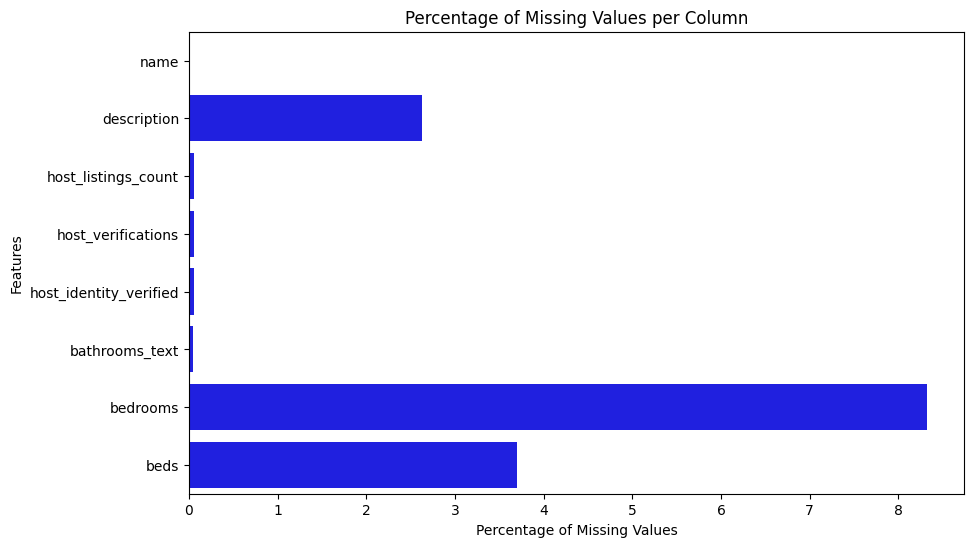

In [12]:
missing_values = entire_home_2022.isnull().sum()

# Step 2: Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Step 3: Calculate the percentage of missing values
# Make sure the percentage calculation is correct: missing values divided by total rows
missing_percentage = (missing_values / len(entire_home_2022)) * 100

# Print intermediate results for debugging
print("Total number of rows:", len(entire_home_2022))
print("Missing values per column (absolute count):")
print(missing_values)
print("Missing values percentage per column:")
print(missing_percentage)

# Step 4: Plot the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, color='blue')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.show()

In [4]:
# import 2. Analysis/Calendars Analysis/2021_AveragePriceByListingIDPriceRange.csv
avg_price_by_listing_id = pd.read_csv('../../../../2. Analysis/Calendars Analysis/2022/Output Average Price CSV/2022_AveragePriceByListingIDPriceRange.csv')

In [14]:
# drop neighbourhood from avg_price_by_listing_id
avg_price_by_listing_id = avg_price_by_listing_id.drop(columns=['neighbourhood'])

In [15]:
# merge entire_home_2021 with avg_price_by_listing_id on left on id and right on listing_id
entire_home_2022 = entire_home_2022.merge(avg_price_by_listing_id, left_on='id', right_on='listing_id', how='left')

In [16]:
entire_home_2022 = entire_home_2022.dropna(subset=['listing_id'])

In [17]:
entire_home_2022 = entire_home_2022.dropna(subset=['host_listings_count'])

In [18]:
entire_home_2022 = entire_home_2022.drop(columns=['id'])

In [19]:
print(entire_home_2022.shape)

(38195, 26)


In [20]:
entire_home_2022['bathrooms'] = entire_home_2022['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ggeor\AppData\Local\Temp\ipykernel_60952\1385990980.py:1: SyntaxWarning: invalid escape sequence '\d'
  entire_home_2022['bathrooms'] = entire_home_2022['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)


In [21]:
entire_home_2022 = entire_home_2022.drop(columns=['bathrooms_text'])

In [22]:
# impute missing values for name and description columns with empty strings
entire_home_2022['name'].fillna('', inplace=True)
entire_home_2022['description'].fillna('', inplace=True)

C:\Users\ggeor\AppData\Local\Temp\ipykernel_60952\2189357056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  entire_home_2022['name'].fillna('', inplace=True)
C:\Users\ggeor\AppData\Local\Temp\ipykernel_60952\2189357056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [23]:
# impute bathrooms, bedrooms, beds with the median value by price segment and neighbourhood_cleansed
entire_home_2022['bathrooms'] = entire_home_2022['bathrooms'].fillna(entire_home_2022.groupby(['price_segment', 'neighbourhood_cleansed'])['bathrooms'].transform('median'))
entire_home_2022['bedrooms'] = entire_home_2022['bedrooms'].fillna(entire_home_2022.groupby(['price_segment', 'neighbourhood_cleansed'])['bedrooms'].transform('median'))
entire_home_2022['beds'] = entire_home_2022['beds'].fillna(entire_home_2022.groupby(['price_segment', 'neighbourhood_cleansed'])['beds'].transform('median'))
entire_home_2022['host_listings_count'] = entire_home_2022['host_listings_count'].fillna(entire_home_2022.groupby(['price_segment', 'neighbourhood_cleansed'])['host_listings_count'].transform('median'))

In [24]:
# assign the mode value in the null values of host_identity_verified
entire_home_2022['host_identity_verified'] = entire_home_2022['host_identity_verified'].fillna(entire_home_2022['host_identity_verified'].mode()[0])

In [25]:
entire_home_2022['host_verifications'] = entire_home_2022['host_verifications'].fillna('')

In [26]:
# where price_segment equal budget save this subset to budget_2021
budget_2022 = entire_home_2022[entire_home_2022['price_segment'] == 'Budget']
# where price_segment equal Mid-Range save this subset to mid_range_2021
mid_range_2022 = entire_home_2022[entire_home_2022['price_segment'] == 'Mid-Range']
# where price_segment equal High-End save this subset to high_end_2021
high_end_2022 = entire_home_2022[entire_home_2022['price_segment'] == 'High-End']
# where price_segment equal Luxury save this subset to luxury_2021
luxury_2022 = entire_home_2022[entire_home_2022['price_segment'] == 'Luxury']
# where price_segment equal Superior save this subset to superior_2021
superior_2022 = entire_home_2022[entire_home_2022['price_segment'] == 'Superior']

# save csv files for each subset in budget_2021, mid_range_2021, high_end_2021, luxury_2021, superior_2021 with that names in csv
budget_2022.to_csv('budget_2022.csv', index=False)
mid_range_2022.to_csv('mid_range_2022.csv', index=False)
high_end_2022.to_csv('high_end_2022.csv', index=False)
luxury_2022.to_csv('luxury_2022.csv', index=False)
superior_2022.to_csv('superior_2022.csv', index=False)

In [27]:
conditions = (
    ((entire_home_2022['most_frequent_segment'] == 'Budget') & (entire_home_2022['mean_price'] >= 8) & (entire_home_2022['mean_price'] <= 90)) |
    ((entire_home_2022['most_frequent_segment'] == 'Mid-Range') & (entire_home_2022['mean_price'] >= 91) & (entire_home_2022['mean_price'] <= 125)) |
    ((entire_home_2022['most_frequent_segment'] == 'High-End') & (entire_home_2022['mean_price'] >= 126) & (entire_home_2022['mean_price'] <= 196)) |
    ((entire_home_2022['most_frequent_segment'] == 'Luxury') & (entire_home_2022['mean_price'] >= 197) & (entire_home_2022['mean_price'] <= 355)) |
    ((entire_home_2022['most_frequent_segment'] == 'Superior') & (entire_home_2022['mean_price'] >= 356) & (entire_home_2022['mean_price'] <= 8000)) |
    pd.isna(entire_home_2022['most_frequent_segment'])
)

# apply the conditions to the entire_home_2021 dataframe
entire_home_2022 = entire_home_2022[conditions]

In [28]:
# drop the most_frequent_segment 
entire_home_2022 = entire_home_2022.drop(columns=['most_frequent_segment'])

In [29]:
# London's central point latitude and longitude according to latlong.net
london_lat = 51.509865
london_lon = -0.118092

# calculate the distance from the central point of London using harvesine formula library
from haversine import haversine

entire_home_2022['distance_from_centre_in_km'] = entire_home_2022.apply(lambda x: haversine((london_lat, london_lon), (x['latitude'], x['longitude'])), axis=1)

In [30]:
# calculate the number of listings in of price segment within a neighbourhood and assign the number to a new column for each listing
entire_home_2022['#_listings_in_neighbourhood'] = entire_home_2022.groupby(['neighbourhood_cleansed'])['listing_id'].transform('count')

In [33]:
# drop price_segment column
entire_home_2022 = entire_home_2022.drop(columns=['price_segment'])

In [34]:
# create data with mean price excluding the price columns and name it entire_home_2021_mean_price and entire_home_2021_original_price
entire_home_2022_mean_price = entire_home_2022.drop(columns=['price'])

In [35]:
entire_home_2022_original_price = entire_home_2022.drop(columns=['mean_price'])

In [36]:
# drop listing_id from entire_home_2021_mean_price and entire_home_2021_original_price
entire_home_2022_mean_price = entire_home_2022_mean_price.drop(columns=['listing_id'])
entire_home_2022_original_price = entire_home_2022_original_price.drop(columns=['listing_id'])

In [37]:
# columns to one hot encode host_identity_verified, neighbourhood_cleansed, instant_bookable
entire_home_2022_mean_price = pd.get_dummies(entire_home_2022_mean_price, columns=['host_identity_verified', 'neighbourhood_cleansed', 'instant_bookable'])

In [38]:
print(entire_home_2022_mean_price.shape)

(37150, 58)


In [39]:
cols_to_standardise = []
binary_cols = []
# print the integer columns
for columns in entire_home_2022_mean_price.select_dtypes(include=['int64']).columns:
   # store only columns in a list that have more that two unique values
    if len(entire_home_2022_mean_price[columns].unique()) > 2:
         # store the columns in a list
         print(columns)
         cols_to_standardise.append(columns)
    elif len(entire_home_2022_mean_price[columns].unique()) == 2:
        print(columns)
        binary_cols.append(columns)

accommodates
minimum_nights
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
#_listings_in_neighbourhood


In [40]:
# for columns that are float append to cols_to_standardise
for columns in entire_home_2022_mean_price.select_dtypes(include=['float64']).columns:
    cols_to_standardise.append(columns)
    print(columns)

host_listings_count
latitude
longitude
bedrooms
beds
mean_price
bathrooms
distance_from_centre_in_km


In [41]:
# remove mean_price from cols_to_standardise
cols_to_standardise.remove('mean_price')

In [42]:
def clean_text(text):
    return re.sub('\W+|\d+', ' ', text).lower().strip()

def parse_amenities(amenities):
    # split only by commas that are not inside quotes
    pattern = re.compile(r',\s*(?![^"]*"(?:(?:[^"]*"){2})*[^"]*$)')
    # split the string, remove quotes, and apply clean_text to each item
    return [clean_text(item.strip(' "\'')) for item in pattern.split(amenities)]

def custom_tokenizer(text):
    return parse_amenities(text)

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ggeor\AppData\Local\Temp\ipykernel_60952\3896021812.py:2: SyntaxWarning: invalid escape sequence '\W'
  return re.sub('\W+|\d+', ' ', text).lower().strip()


In [45]:
vectorizer = CountVectorizer(binary=True, tokenizer=custom_tokenizer, preprocessor=None, stop_words='english')

amenities_matrix = vectorizer.fit_transform(entire_home_2022_mean_price['amenities'])

amentities_df = pd.DataFrame(amenities_matrix.toarray(), columns=vectorizer.get_feature_names_out())

C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [46]:
# remove the column with name ''
amentities_df = amentities_df.drop(columns=[''])

In [47]:
host_verifications_matrix = vectorizer.fit_transform(entire_home_2022_mean_price['host_verifications'])

host_verifications_df = pd.DataFrame(host_verifications_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(host_verifications_df)

C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


          email  facebook  google  government_id  identity_manual  jumio  kba  \
0      0      1         0       0              1                0      1    0   
1      0      1         0       0              1                1      1    0   
2      0      1         0       0              1                0      1    0   
3      0      1         1       0              1                0      0    1   
4      0      1         1       0              1                0      1    0   
...   ..    ...       ...     ...            ...              ...    ...  ...   
37145  0      1         0       1              1                1      0    0   
37146  0      1         0       0              1                0      1    0   
37147  0      1         0       0              1                1      0    0   
37148  0      1         0       0              1                1      0    0   
37149  0      1         1       0              1                1      1    0   

       manual_offline  manu

In [48]:
# remove the column with name ''
host_verifications_df = host_verifications_df.drop(columns=[''])

In [5]:
# import host_verifications.csv and amentities_df.csv
amenities_2020 = pd.read_csv('../../../../2. Analysis/Listings Analysis/2020/Datasets 2020/amentities_df.csv')
host_verifications_2020 = pd.read_csv('../../../../2. Analysis/Listings Analysis/2020/Datasets 2020/host_verifications_df.csv')

In [50]:
# find the common columns between host_verifications_df and host_verifications_2020
common_columns = host_verifications_df.columns.intersection(host_verifications_2020.columns)

print(common_columns)

Index(['email', 'facebook', 'google', 'government_id', 'identity_manual',
       'jumio', 'kba', 'manual_offline', 'manual_online',
       'offline_government_id', 'phone', 'reviews', 'selfie', 'sent_id',
       'sesame', 'sesame_offline', 'weibo', 'work_email', 'zhima_selfie'],
      dtype='object')


In [51]:
# find the common columns amenities_df and amenities_2020
common_columns_amenities = amentities_df.columns.intersection(amenities_2020.columns)

print(common_columns_amenities)

Index(['air conditioning', 'apple tv', 'baby bath', 'baby monitor',
       'babysitter recommendations', 'balcony', 'bathroom essentials',
       'bathtub', 'bbq grill', 'beach essentials',
       ...
       'terrace', 'tv', 'video games', 'washer', 'waterfront', 'wet bar',
       'wifi', 'window guards', 'wine cooler', 'wood burning fireplace'],
      dtype='object', length=130)


In [52]:
# print the len of common_columns and common_columns_amenities
print(len(common_columns))
print(len(common_columns_amenities))

19
130


In [53]:
# len of amenities_df and and amenities_2020
print(len(amentities_df.columns))
print(len(amenities_2020.columns))

2061
220


In [54]:
# from amentities_df drop the columns that are not in common_columns_amenities
amentities_df = amentities_df.drop(columns=amentities_df.columns.difference(common_columns_amenities))

# from host_verifications_df drop the columns that are not in common_columns
host_verifications_df = host_verifications_df.drop(columns=host_verifications_df.columns.difference(common_columns))

In [55]:
# merge the amenities_df with entire_home
entire_home_2022_mean_price = pd.concat([entire_home_2022_mean_price, amentities_df], axis=1)

# merge the host_verifications_df with entire_home
entire_home_2022_mean_price = pd.concat([entire_home_2022_mean_price, host_verifications_df], axis=1)

In [56]:
# drop na values
entire_home_2022_mean_price = entire_home_2022_mean_price.dropna()

Dataset with MEAN PRICE

In [57]:
# import mean squared error
from sklearn.metrics import mean_squared_error
# import r2 score
from sklearn.metrics import r2_score
# import mean absolute error
from sklearn.metrics import mean_absolute_error
# import matplotlib
import matplotlib.pyplot as plt
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [61]:
# import standard scaler and split the data into training and test sets 70/30
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X = entire_home_2022_mean_price.drop(columns=['mean_price'])
y = entire_home_2022_mean_price['mean_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# splot the training into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2222, random_state=42)

In [62]:
# drop columns with name amenities and host_verifications
X_train = X_train.drop(columns=['amenities', 'host_verifications'])
X_val = X_val.drop(columns=['amenities', 'host_verifications'])
X_test = X_test.drop(columns=['amenities', 'host_verifications'])


In [63]:
def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  
  pos_counts = Counter()

  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

In [64]:
# Function to process a single text entry
def process_text(text):
    cleaned = re.sub('\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    
    stop_words = stopwords.words("english")
    filtered = [word for word in tokenized if word not in stop_words]
    
    normaliser = WordNetLemmatizer()
    normalised = [normaliser.lemmatize(token, get_part_of_speech(token)) for token in filtered] 
    
    
    return ' '.join(normalised)

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ggeor\AppData\Local\Temp\ipykernel_60952\1139382963.py:3: SyntaxWarning: invalid escape sequence '\W'
  cleaned = re.sub('\W+', ' ', text).lower()


In [65]:
def process_text_columns(train_df, val_df, test_df, text_columns, n_components=50):
    """
    Processes the specified text columns in training, validation, and test DataFrames.
    Applies TF-IDF vectorization and SVD to reduce dimensionality.
    Concatenates the resulting components to the original DataFrames.

    Parameters:
    - train_df (pd.DataFrame): The training DataFrame containing the text columns to process.
    - val_df (pd.DataFrame): The validation DataFrame containing the text columns to process.
    - test_df (pd.DataFrame): The test DataFrame containing the text columns to process.
    - text_columns (list): List of column names in the DataFrame to process as text.
    - n_components (int): Number of components for SVD dimensionality reduction.

    Returns:
    - pd.DataFrame, pd.DataFrame, pd.DataFrame: The modified training, validation, and test DataFrames with added SVD components.
    """

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))

    # List to store the transformed SVD components for training, validation, and test sets
    svd_columns_train = []
    svd_columns_val = []
    svd_columns_test = []

    # Process each text column
    for text_column in text_columns:
        # Apply the custom text processing function
        train_text = train_df[text_column].apply(process_text)
        val_text = val_df[text_column].apply(process_text)
        test_text = test_df[text_column].apply(process_text)
        
        # Fit TF-IDF on the training data and transform training, validation, and test data
        tfidf_matrix_train = vectorizer.fit_transform(train_text)
        tfidf_matrix_val = vectorizer.transform(val_text)
        tfidf_matrix_test = vectorizer.transform(test_text)

        # Apply SVD to reduce dimensionality (fit only on training data)
        svd = TruncatedSVD(n_components=n_components, random_state=42)
        svd_matrix_train = svd.fit_transform(tfidf_matrix_train)
        svd_matrix_val = svd.transform(tfidf_matrix_val)
        svd_matrix_test = svd.transform(tfidf_matrix_test)
        
        # Append the SVD components to the respective lists
        svd_columns_train.append(svd_matrix_train)
        svd_columns_val.append(svd_matrix_val)
        svd_columns_test.append(svd_matrix_test)

    # Concatenate all SVD components into one matrix for training, validation, and test data
    combined_features_train = np.hstack(svd_columns_train)
    combined_features_val = np.hstack(svd_columns_val)
    combined_features_test = np.hstack(svd_columns_test)

    # Convert the combined features into DataFrames
    combined_features_df_train = pd.DataFrame(combined_features_train, columns=[f'component_{i+1}' for i in range(combined_features_train.shape[1])], index=train_df.index)
    combined_features_df_val = pd.DataFrame(combined_features_val, columns=[f'component_{i+1}' for i in range(combined_features_val.shape[1])], index=val_df.index)
    combined_features_df_test = pd.DataFrame(combined_features_test, columns=[f'component_{i+1}' for i in range(combined_features_test.shape[1])], index=test_df.index)

    # Concatenate the combined features DataFrame with the original DataFrames
    train_df = pd.concat([train_df, combined_features_df_train], axis=1)
    val_df = pd.concat([val_df, combined_features_df_val], axis=1)
    test_df = pd.concat([test_df, combined_features_df_test], axis=1)

    return train_df, val_df, test_df

In [66]:
text_columns = ['name', 'description']

In [67]:
# apply the process_text_columns function
X_train, X_test, X_val = process_text_columns(X_train, X_test,X_val, text_columns)

In [68]:
# drop name and description columns
X_train = X_train.drop(columns=text_columns)
X_test = X_test.drop(columns=text_columns)
X_val = X_val.drop(columns=text_columns)

In [70]:
print(X_train)

       host_listings_count   latitude  longitude  accommodates  bedrooms  \
4423                   1.0  51.536970  -0.223010           4.0       2.0   
24174                168.0  51.495320  -0.186920           2.0       1.0   
17531               1185.0  51.453280  -0.185560           7.0       4.0   
22150                  4.0  51.400940  -0.119670           2.0       1.0   
36581                  0.0  51.472000  -0.087850           4.0       2.0   
...                    ...        ...        ...           ...       ...   
18771                  1.0  51.594810  -0.016620           5.0       3.0   
29316                  1.0  51.501910  -0.022980           5.0       2.0   
31349                  1.0  51.570760  -0.367290           3.0       1.0   
33536                  0.0  51.490940  -0.178670           2.0       1.0   
2111                   2.0  51.555218  -0.145034           2.0       1.0   

       beds  minimum_nights  availability_30  availability_60  \
4423    2.0           

In [71]:
# if column starts with component append to cols_to_standardise
for columns in X_train.columns:
    if columns.startswith('component'):
        cols_to_standardise.append(columns)

In [72]:
# if column in cols_to_standardise then standardise
scaler = StandardScaler()
X_train[cols_to_standardise] = scaler.fit_transform(X_train[cols_to_standardise])
X_test[cols_to_standardise] = scaler.transform(X_test[cols_to_standardise])
X_val[cols_to_standardise] = scaler.transform(X_val[cols_to_standardise])

In [73]:
# log transform the target variable
import numpy as np
y_train = np.log(y_train)
y_test = np.log(y_test)
y_val = np.log(y_val)

In [74]:
# stardardise the target variable
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))
y_val = y_scaler.transform(y_val.values.reshape(-1, 1))

# flatten the y_train and y_test using ravel
y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()

In [77]:
from sklearn.linear_model import Lasso

In [78]:
def train_evaluate_lasso(X_train, y_train, X_val, y_val, alpha=0.0001):
    """
    Trains and evaluates a Lasso model using provided training and validation sets.

    Parameters:
    X_train (DataFrame): Training feature data.
    y_train (Series): Training target data.
    X_val (DataFrame): Validation feature data.
    y_val (Series): Validation target data.
    alpha (float): Regularization strength; must be a positive float.

    Returns:
    Lasso: The trained Lasso model.
    dict: Dictionary containing metrics (R² and RMSE for training and validation data).
    """
    # Initialize the Lasso model with the specified alpha value
    lasso_model = Lasso(alpha=alpha, max_iter=10000, random_state=42)

    # Fit the model using the training set
    lasso_model.fit(X_train, y_train)

    # Predict on training and validation sets
    y_train_pred = lasso_model.predict(X_train)
    y_val_pred = lasso_model.predict(X_val)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Print metrics
    print("Training Data Metrics:")
    print(f"Training Data R²: {train_r2:.4f}")
    print(f"Training Data RMSE: {train_rmse:.4f}")
    print("Validation Data Metrics:")
    print(f"Validation Data R²: {val_r2:.4f}")
    print(f"Validation Data RMSE: {val_rmse:.4f}")
    
    # Return the model and metrics
    metrics = {
        'train_r2': train_r2,
        'train_rmse': train_rmse,
        'val_r2': val_r2,
        'val_rmse': val_rmse
    }

    return lasso_model, metrics

# Example usage:
# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed
# Define an alpha value to use
alpha_value = 0.0001

# Train and evaluate the Lasso model
lasso_model, metrics = train_evaluate_lasso(X_train, y_train, X_val, y_val, alpha=alpha_value)

# Display the results
print("Lasso Model Metrics:")
print(metrics)

Training Data Metrics:
Training Data R²: 0.5724
Training Data RMSE: 0.6539
Validation Data Metrics:
Validation Data R²: 0.5808
Validation Data RMSE: 0.6513
Lasso Model Metrics:
{'train_r2': 0.5723893860338063, 'train_rmse': 0.6539194246741672, 'val_r2': 0.5807816473985814, 'val_rmse': 0.6513047205207932}


In [79]:
def plot_lasso_coefficients(model, feature_names, num_features=40):
    """
    Plots the coefficients of a trained Lasso model.

    Parameters:
    model (Lasso): The trained Lasso model.
    feature_names (list): List of feature names.
    num_features (int): Number of top features to plot.
    """
    # Create a DataFrame from the model's coefficients and feature names
    coefficients_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_
    })
    
    # Sort by absolute values of the coefficients
    top_features = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)
    
    # Select the top num_features
    top_features = top_features.head(num_features)

    # Plot the coefficients
    plt.figure(figsize=(10, 8))
    plt.barh(top_features['Feature'], top_features['Coefficient'], 
             color=['red' if x < 0 else 'blue' for x in top_features['Coefficient']])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title(f'Top {num_features} Features with Highest Absolute Coefficients')
    plt.gca().invert_yaxis()  # Highest values at top
    plt.show()

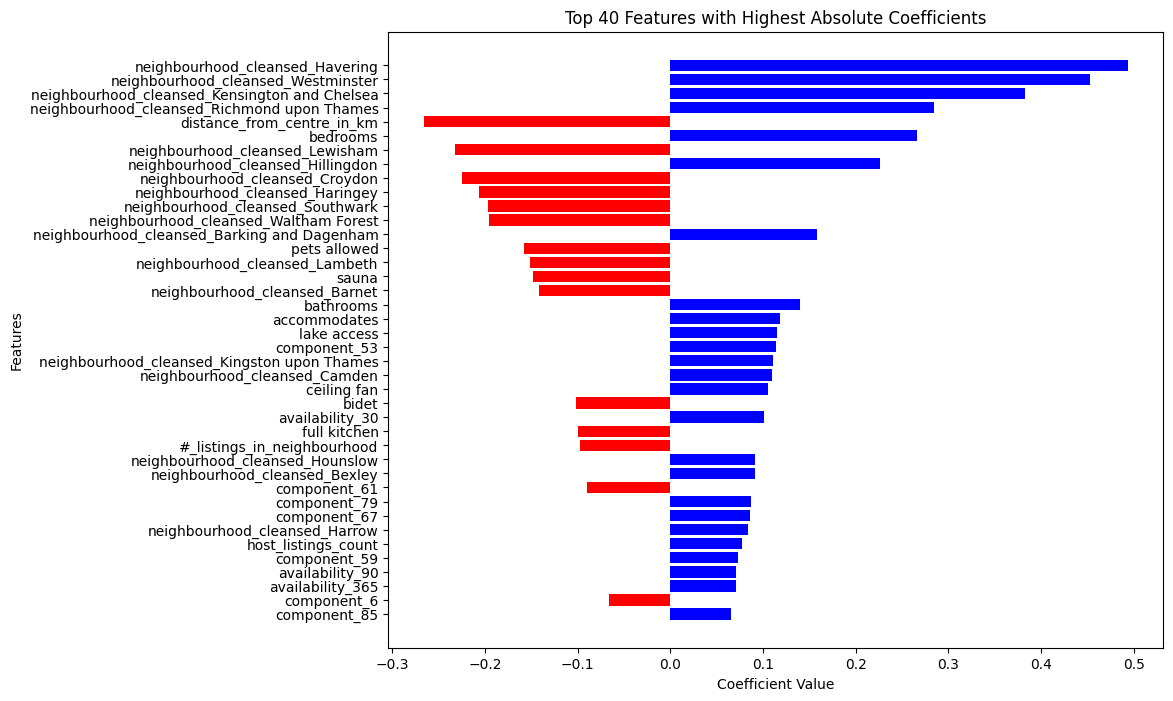

In [80]:
# apply the plot_lasso_coefficients function
plot_lasso_coefficients(lasso_model, X_train.columns)

In [81]:
def evaluate_lasso_model(lasso_model, X_train, y_train, X_test, y_test, coefficients_df):
    """
    Evaluates the Lasso model by plotting top coefficients, residuals, and returning model metrics.

    Parameters:
    lasso_model (Lasso): The trained Lasso model.
    X_train (DataFrame): Training feature data.
    y_train (Series): Training target data.
    X_test (DataFrame): Test feature data.
    y_test (Series): Test target data.
    coefficients_df (DataFrame): DataFrame containing feature names and their coefficients.

    Returns:
    DataFrame: A DataFrame of selected features based on non-zero coefficients.
    """
    # Plot top 30 features with the highest coefficients
    top_features = coefficients_df.sort_values(by='Coefficient', ascending=False).head(30)
    plt.figure(figsize=(10, 8))
    plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient')
    plt.ylabel('Features')
    plt.title('Top 30 Features with Highest Coefficients')
    plt.gca().invert_yaxis()
    plt.show()

    # Features with non-zero coefficients
    non_zero_mask = lasso_model.coef_ != 0
    selected_features = X_train.columns[non_zero_mask]
    selected_features_df = pd.DataFrame(selected_features, columns=['selected_features'])

    # Predict on the test set
    y_pred = lasso_model.predict(X_test)
    residuals = y_test - y_pred

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted Values')
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=20, color='blue', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

    # Calculate metrics
    train_r2 = r2_score(y_train, lasso_model.predict(X_train))
    test_r2 = r2_score(y_test, y_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Training Data - R^2: {train_r2}, RMSE: {train_rmse}")
    print(f"Test Data - R^2: {test_r2}, RMSE: {test_rmse}")

    return selected_features_df

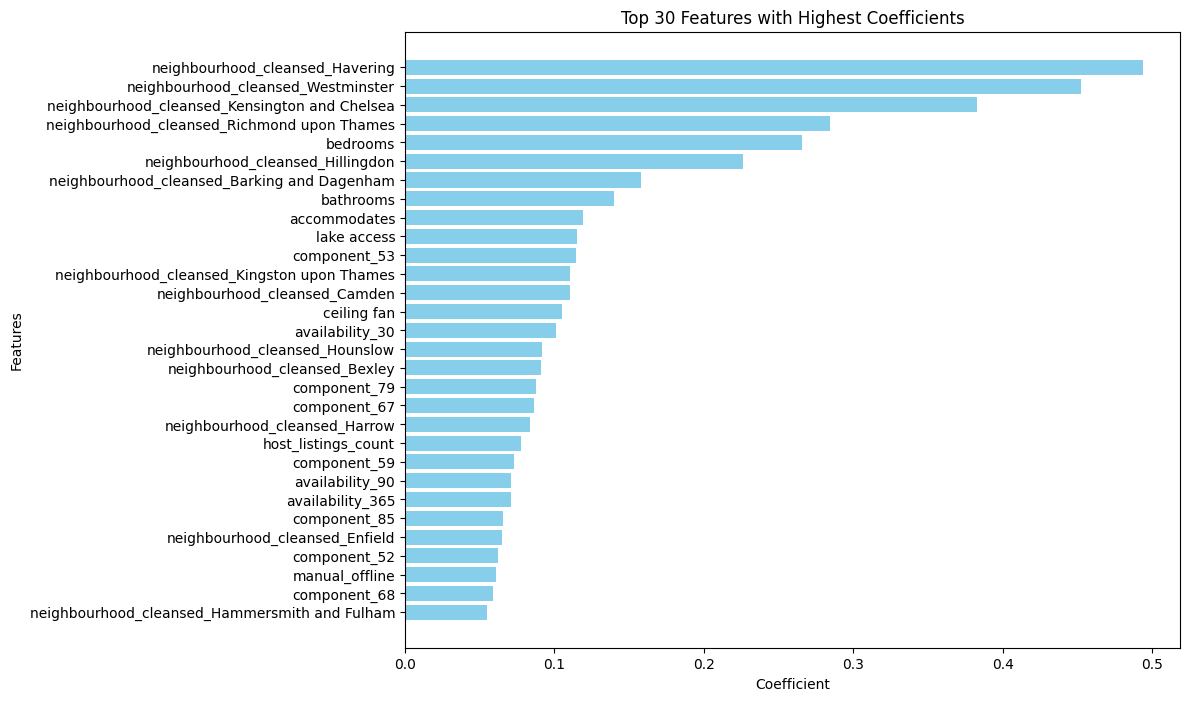

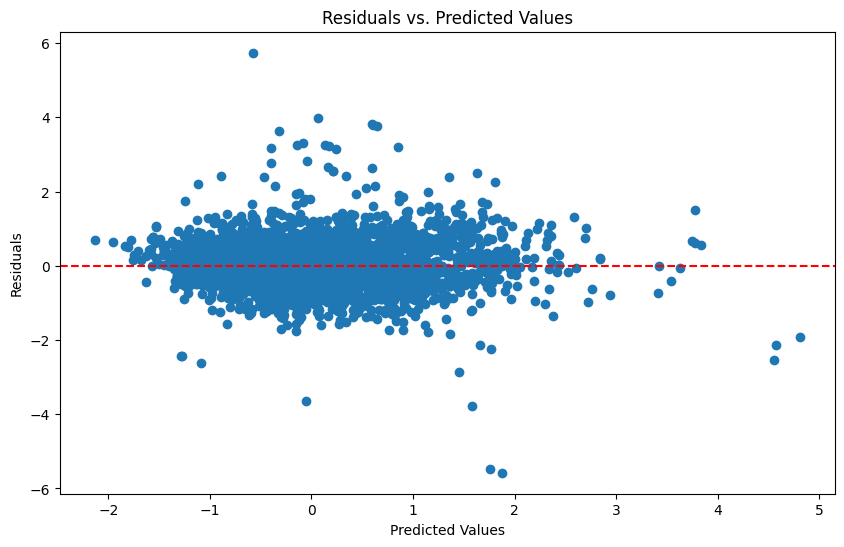

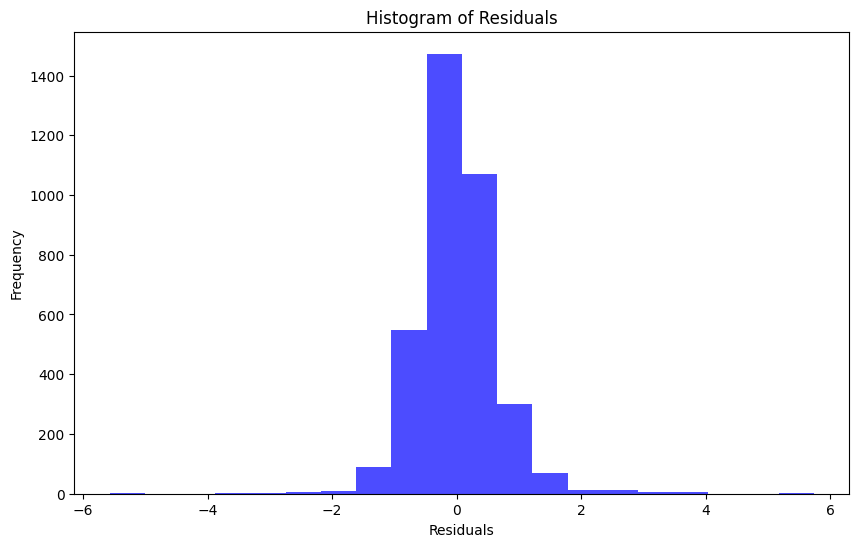

Training Data - R^2: 0.5723893860338063, RMSE: 0.6539194246741672
Test Data - R^2: 0.5917200748732034, RMSE: 0.6403921893489797


In [82]:
# apply the evaluate_lasso_model function
# store the coefficients in a dataframe
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})
selected_features_df = evaluate_lasso_model(lasso_model, X_train, y_train, X_test, y_test, coefficients_df)

In [83]:
import xgboost as xgb

In [84]:
def train_evaluate_xgboost(X_train, y_train, X_val, y_val, X_test, y_test, random_state=42):
    """
    Trains and evaluates an XGBoost model using provided training, validation, and test sets.
    
    Parameters:
    X_train (DataFrame): Training feature data.
    y_train (Series): Training target data.
    X_val (DataFrame): Validation feature data.
    y_val (Series): Validation target data.
    X_test (DataFrame): Test feature data.
    y_test (Series): Test target data.
    random_state (int): Seed for random operations to ensure reproducibility.

    Returns:
    xgb.XGBRegressor: The trained XGBoost model.
    dict: Dictionary containing metrics (R² and RMSE for training and test data).
    """
    # Initialize the XGBRegressor with specified hyperparameters
    xgb_model = xgb.XGBRegressor(
        max_depth=3,
        min_child_weight=1,
        gamma=0.1,
        alpha=1,
        learning_rate=0.1,
        n_estimators=200,
        subsample=0.8,
        colsample_bytree=1,
        random_state=random_state
    )

    # Fit the model using the training set and validate using the validation set
    xgb_model.fit(
        X_train, y_train, 
        eval_metric="rmse", 
        eval_set=[(X_val, y_val)], 
        early_stopping_rounds=10, 
        verbose=True
    )

    # Predict on training, validation, and test sets
    y_train_pred = xgb_model.predict(X_train)
    y_val_pred = xgb_model.predict(X_val)
    y_test_pred = xgb_model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print metrics
    print("Training Data Metrics:")
    print(f"Training Data R²: {train_r2:.4f}")
    print(f"Training Data RMSE: {train_rmse:.4f}")
    print("Validation Data Metrics:")
    print(f"Validation Data R²: {val_r2:.4f}")
    print(f"Validation Data RMSE: {val_rmse:.4f}")
    print("Test Data Metrics:")
    print(f"Test Data R²: {test_r2:.4f}")
    print(f"Test Data RMSE: {test_rmse:.4f}")
    
    # Return the model and metrics
    metrics = {
        'train_r2': train_r2,
        'train_rmse': train_rmse,
        'val_r2': val_r2,
        'val_rmse': val_rmse,
        'test_r2': test_r2,
        'test_rmse': test_rmse
    }

    return xgb_model, metrics

In [88]:
# if column has 0 or 1 then transform to boolean for X_train, X_val, X_test and create a loop to detect cols with 0 or 1
for columns in X_train.columns:
    if X_train[columns].nunique() == 2:
        X_train[columns] = X_train[columns].astype(bool)
        X_val[columns] = X_val[columns].astype(bool)
        X_test[columns] = X_test[columns].astype(bool)

In [89]:
print(X_train)

       host_listings_count  latitude  longitude  accommodates  bedrooms  \
4423             -0.193765  0.623788  -1.041293      0.056012  0.217078   
24174             0.218326 -0.326454  -0.627119     -0.939709 -0.793818   
17531             2.727889 -1.285593  -0.611511      1.549594  2.238869   
22150            -0.186363 -2.479726   0.144651     -0.939709 -0.793818   
36581            -0.196233 -0.858498   0.509822      0.056012  0.217078   
...                    ...       ...        ...           ...       ...   
18771            -0.193765  1.943403   1.327267      0.553873  1.227973   
29316            -0.193765 -0.176103   1.254279      0.553873  0.217078   
31349            -0.193765  1.394704  -2.697070     -0.441849 -0.793818   
33536            -0.196233 -0.426383  -0.532441     -0.939709 -0.793818   
2111             -0.191298  1.040115  -0.146429     -0.939709 -0.793818   

           beds  minimum_nights  availability_30  availability_60  \
4423  -0.107242       -0.15060

In [90]:
# apply the train_evaluate_xgboost function
xgb_model, metrics = train_evaluate_xgboost(X_train, y_train, X_val, y_val, X_test, y_test)

[0]	validation_0-rmse:0.96996
[1]	validation_0-rmse:0.94162
[2]	validation_0-rmse:0.91669
[3]	validation_0-rmse:0.89236
[4]	validation_0-rmse:0.87183
[5]	validation_0-rmse:0.85579
[6]	validation_0-rmse:0.83550


C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.81953
[8]	validation_0-rmse:0.80402
[9]	validation_0-rmse:0.79125
[10]	validation_0-rmse:0.77863
[11]	validation_0-rmse:0.76829
[12]	validation_0-rmse:0.76009
[13]	validation_0-rmse:0.75085
[14]	validation_0-rmse:0.74347
[15]	validation_0-rmse:0.73504
[16]	validation_0-rmse:0.72850
[17]	validation_0-rmse:0.72115
[18]	validation_0-rmse:0.71452
[19]	validation_0-rmse:0.70946
[20]	validation_0-rmse:0.70391
[21]	validation_0-rmse:0.69939
[22]	validation_0-rmse:0.69479
[23]	validation_0-rmse:0.68978
[24]	validation_0-rmse:0.68653
[25]	validation_0-rmse:0.68235
[26]	validation_0-rmse:0.67928
[27]	validation_0-rmse:0.67661
[28]	validation_0-rmse:0.67288
[29]	validation_0-rmse:0.67004
[30]	validation_0-rmse:0.66717
[31]	validation_0-rmse:0.66489
[32]	validation_0-rmse:0.66243
[33]	validation_0-rmse:0.66018
[34]	validation_0-rmse:0.65782
[35]	validation_0-rmse:0.65578
[36]	validation_0-rmse:0.65420
[37]	validation_0-rmse:0.65207
[38]	validation_0-rmse:0.65029
[39]	valida

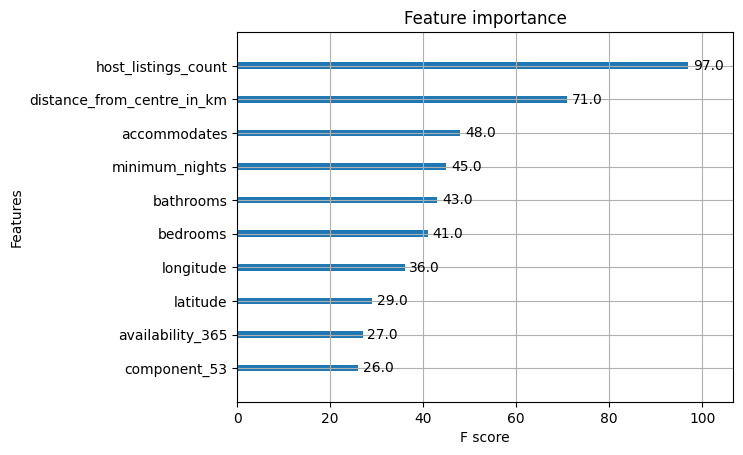

In [91]:
# plot the feature importance   
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)

# show the plot
plt.show()

Original Price

In [92]:
# clean the price from entire_home_2021_original_price 
entire_home_2022_original_price['price'] = entire_home_2022_original_price['price'].str.replace('$', '')

In [93]:
print(entire_home_2022_original_price['price'])

0         75.00
1        265.00
2        195.00
3        190.00
4        250.00
          ...  
38245    120.00
38246    288.00
38247    104.00
38248    402.00
38249     70.00
Name: price, Length: 37150, dtype: object


In [94]:
# transform the price to float could not convert string to float: '1,300.00'
entire_home_2022_original_price['price'] = entire_home_2022_original_price['price'].str.replace(',', '').astype(float)

In [95]:
# save price as y_original
y_original = entire_home_2022_original_price['price']

In [96]:
# index the y_original on X_test, X_train and X_val
y_train_aligned = y_original.loc[X_train.index]
y_test_aligned = y_original.loc[X_test.index]
y_val_aligned = y_original.loc[X_val.index]

In [97]:
# standardise the y_train_aligned, y_test_aligned and y_val_aligned
y_train_aligned = np.log(y_train_aligned)
y_test_aligned = np.log(y_test_aligned)
y_val_aligned = np.log(y_val_aligned)

# fit transform the y_train_aligned
y_train_aligned = y_scaler.fit_transform(y_train_aligned.values.reshape(-1, 1))
y_test_aligned = y_scaler.transform(y_test_aligned.values.reshape(-1, 1))
y_val_aligned = y_scaler.transform(y_val_aligned.values.reshape(-1, 1))

# flatten the y_train_aligned, y_test_aligned and y_val_aligned
y_train_aligned = y_train_aligned.ravel()
y_test_aligned = y_test_aligned.ravel()
y_val_aligned = y_val_aligned.ravel()


In [98]:
# train xgboost model on entire_home_2021_original_price
xgb_model, metrics = train_evaluate_xgboost(X_train, y_train_aligned, X_val, y_val_aligned, X_test, y_test_aligned)

[0]	validation_0-rmse:0.96786
[1]	validation_0-rmse:0.93596
[2]	validation_0-rmse:0.90935
[3]	validation_0-rmse:0.88775
[4]	validation_0-rmse:0.86644
[5]	validation_0-rmse:0.84846
[6]	validation_0-rmse:0.82832
[7]	validation_0-rmse:0.81208
[8]	validation_0-rmse:0.79983
[9]	validation_0-rmse:0.78653
[10]	validation_0-rmse:0.77348
[11]	validation_0-rmse:0.76491


C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.75511
[13]	validation_0-rmse:0.74851
[14]	validation_0-rmse:0.73888
[15]	validation_0-rmse:0.73245
[16]	validation_0-rmse:0.72495
[17]	validation_0-rmse:0.71728
[18]	validation_0-rmse:0.71245
[19]	validation_0-rmse:0.70760
[20]	validation_0-rmse:0.70197
[21]	validation_0-rmse:0.69822
[22]	validation_0-rmse:0.69303
[23]	validation_0-rmse:0.68818
[24]	validation_0-rmse:0.68370
[25]	validation_0-rmse:0.67933
[26]	validation_0-rmse:0.67625
[27]	validation_0-rmse:0.67272
[28]	validation_0-rmse:0.66947
[29]	validation_0-rmse:0.66713
[30]	validation_0-rmse:0.66364
[31]	validation_0-rmse:0.66157
[32]	validation_0-rmse:0.65888
[33]	validation_0-rmse:0.65628
[34]	validation_0-rmse:0.65427
[35]	validation_0-rmse:0.65202
[36]	validation_0-rmse:0.65040
[37]	validation_0-rmse:0.64884
[38]	validation_0-rmse:0.64690
[39]	validation_0-rmse:0.64493
[40]	validation_0-rmse:0.64356
[41]	validation_0-rmse:0.64212
[42]	validation_0-rmse:0.64098
[43]	validation_0-rmse:0.63941
[44]	val

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
def analyze_and_plot_segment_specific_data(data):
    """
    This function transforms the 'accommodates' column to float, calculates the average, min, max, 
    and standard deviation for all float and integer columns, and plots the distributions of specific float columns.
    """
    # Convert the 'accommodates' column to float
    data['accommodates'] = data['accommodates'].astype(float)
    
    # Print the average, min, max, and standard deviation of the float and integer columns
    stats = data.select_dtypes(include=['float64', 'int']).describe().loc[['mean', 'min', 'max', 'std']]
    print(stats)
    
    # Plot the distributions of float columns
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Distributions of the Most Important Determinants of Price in Superior Segment')
    
    sns.histplot(data['bedrooms'], bins=50, kde=True, ax=axs[0, 0])
    axs[0, 0].set_title('Bedrooms Distribution')
    
    sns.histplot(data['accommodates'], bins=50, kde=True, ax=axs[0, 1])
    axs[0, 1].set_title('Accommodates Distribution')
    
    sns.histplot(data['host_listings_count'], bins=50, kde=True, ax=axs[1, 0])
    axs[1, 0].set_title('Host Listing Count Distribution')
    
    sns.histplot(data['bathrooms'], bins=50, kde=True, ax=axs[1, 1])
    axs[1, 1].set_title('Bathrooms Distribution')
    
    plt.tight_layout()
    plt.show()

      host_listings_count   latitude  longitude  accommodates  bedrooms  \
mean           147.485621  51.510592  -0.121676      2.741171  1.247198   
min              0.000000  51.295937  -0.486970      1.000000  1.000000   
max           3750.000000  51.668850   0.288570     16.000000  8.000000   
std            688.311145   0.053197   0.097898      1.241164  0.535713   

          beds  minimum_nights  availability_30  availability_60  \
mean  1.477162       11.028970         3.716113         9.229647   
min   1.000000        1.000000         0.000000         0.000000   
max   8.000000     1000.000000        30.000000        60.000000   
std   0.761751       44.785402         7.695736        17.392347   

      availability_90  availability_365  number_of_reviews  \
mean        15.545147         62.251745          12.241806   
min          0.000000          0.000000           0.000000   
max         90.000000        365.000000         401.000000   
std         27.950683        113.24

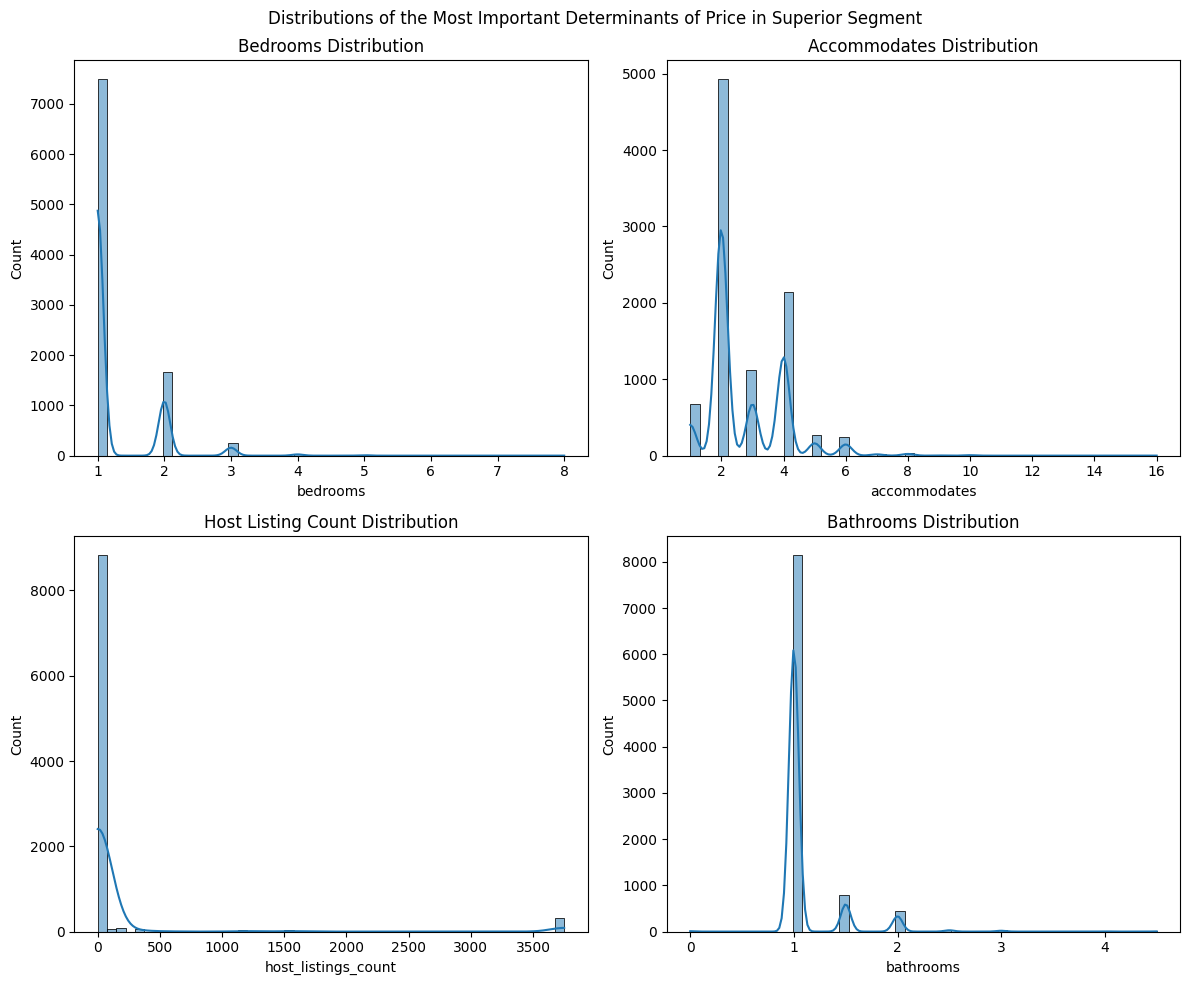

In [101]:
# apply the analyze_and_plot_segment_specific_data function to budget_2021
analyze_and_plot_segment_specific_data(budget_2022)

      host_listings_count   latitude  longitude  accommodates  bedrooms  \
mean            20.516630  51.510366  -0.129346      3.456470  1.536962   
min              0.000000  51.318350  -0.482280      1.000000  1.000000   
max           3750.000000  51.671530   0.265390     16.000000  6.000000   
std            192.924726   0.044679   0.088487      1.451387  0.718201   

          beds  minimum_nights  availability_30  availability_60  \
mean  1.894693        6.301845         4.255656        11.278803   
min   1.000000        1.000000         0.000000         0.000000   
max   9.000000     1000.000000        30.000000        60.000000   
std   0.987177       22.704997         7.821277        18.103884   

      availability_90  availability_365  number_of_reviews  \
mean        19.176415         73.197998          15.612553   
min          0.000000          0.000000           0.000000   
max         90.000000        365.000000         383.000000   
std         29.324205        115.74

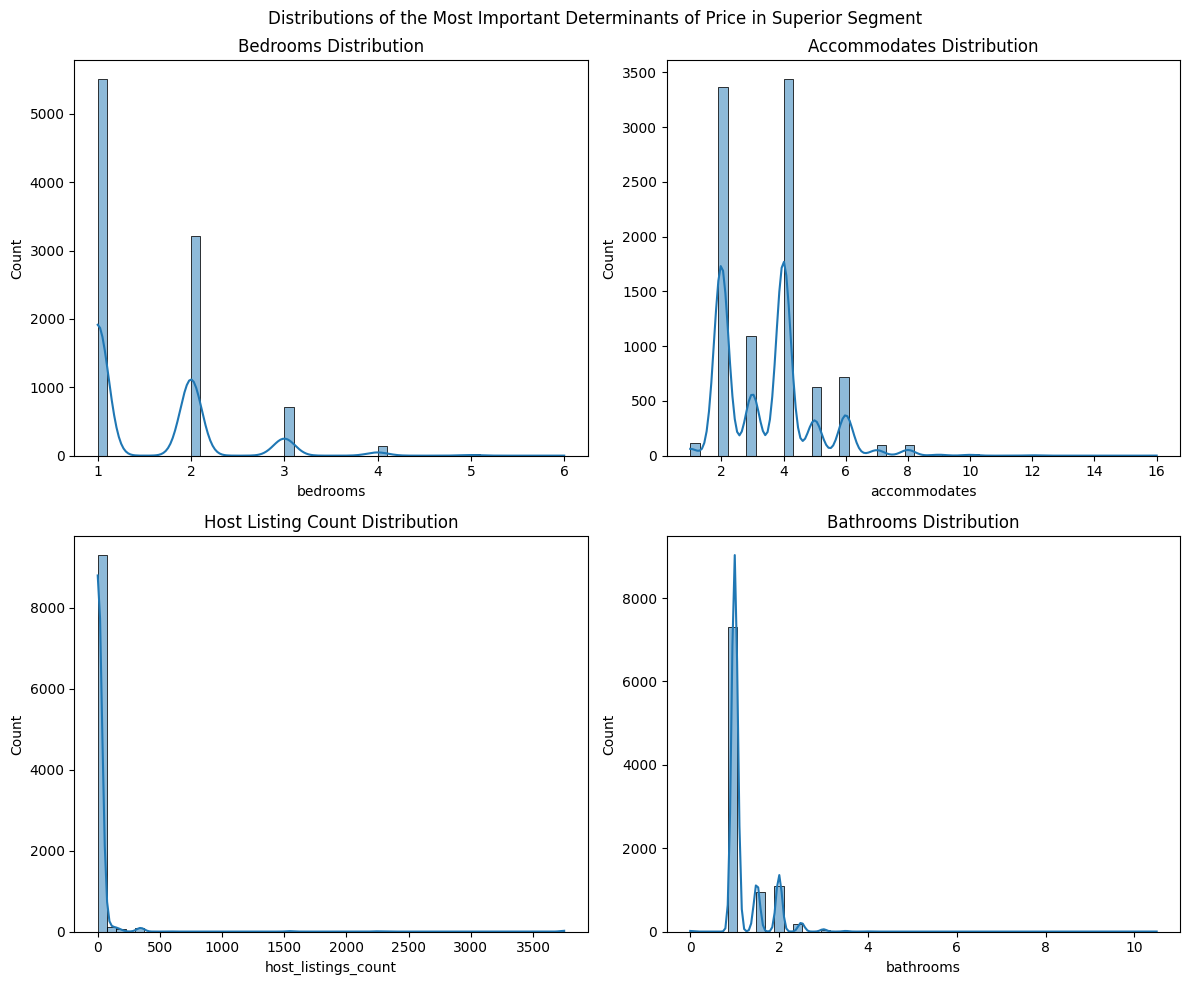

In [102]:
# apply the analyze_and_plot_segment_specific_data function to budget_2021
analyze_and_plot_segment_specific_data(mid_range_2022)

      host_listings_count   latitude  longitude  accommodates  bedrooms  \
mean            23.145975  51.509023  -0.134567      4.173282  1.891382   
min              0.000000  51.296850  -0.496160      1.000000  1.000000   
max           3750.000000  51.668530   0.270380     16.000000  7.000000   
std            138.239915   0.041063   0.088340      1.800429  0.909944   

           beds  minimum_nights  availability_30  availability_60  \
mean   2.312151        6.081616         6.126586        16.024972   
min    1.000000        1.000000         0.000000         0.000000   
max   14.000000     1000.000000        30.000000        60.000000   
std    1.279718       21.575339         9.078581        20.461909   

      availability_90  availability_365  number_of_reviews  \
mean        26.975840        107.366562          14.916455   
min          0.000000          0.000000           0.000000   
max         90.000000        365.000000         974.000000   
std         32.793426        1

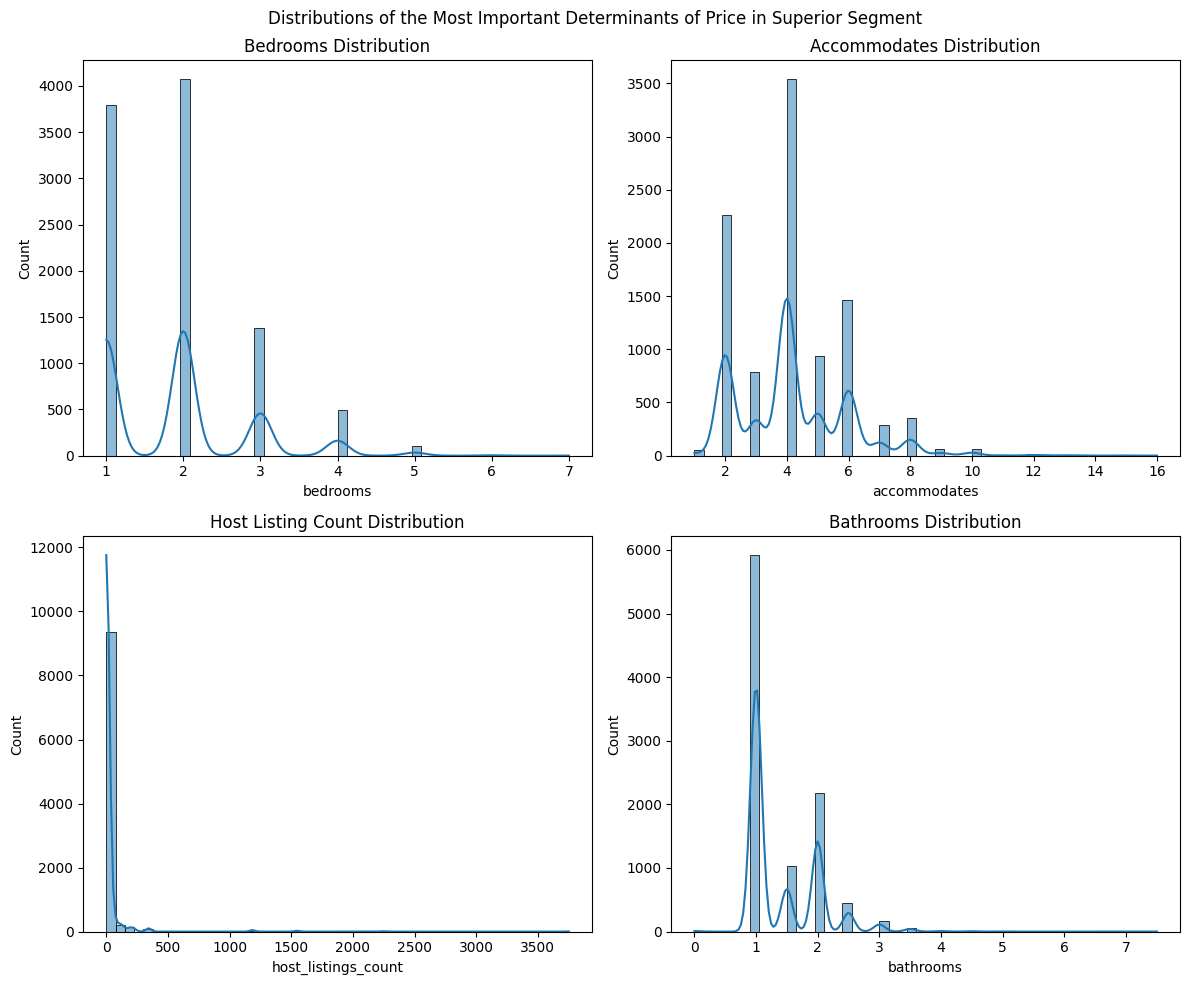

In [103]:
# apply the analyze_and_plot_segment_specific_data function to high_end_2021
analyze_and_plot_segment_specific_data(high_end_2022)

      host_listings_count   latitude  longitude  accommodates  bedrooms  \
mean            54.323966  51.508678  -0.142892      4.925172  2.264828   
min              0.000000  51.299410  -0.479620      1.000000  1.000000   
max           2244.000000  51.662640   0.234820     16.000000  8.000000   
std            219.965938   0.036010   0.073460      2.226428  1.056208   

           beds  minimum_nights  availability_30  availability_60  \
mean   2.742586        5.961724         8.051207        20.837759   
min    1.000000        1.000000         0.000000         0.000000   
max   13.000000      365.000000        30.000000        60.000000   
std    1.563436       14.851565        10.107252        22.140665   

      availability_90  availability_365  number_of_reviews  \
mean        34.635172        140.709483          12.839655   
min          0.000000          0.000000           0.000000   
max         90.000000        365.000000         563.000000   
std         35.035601        1

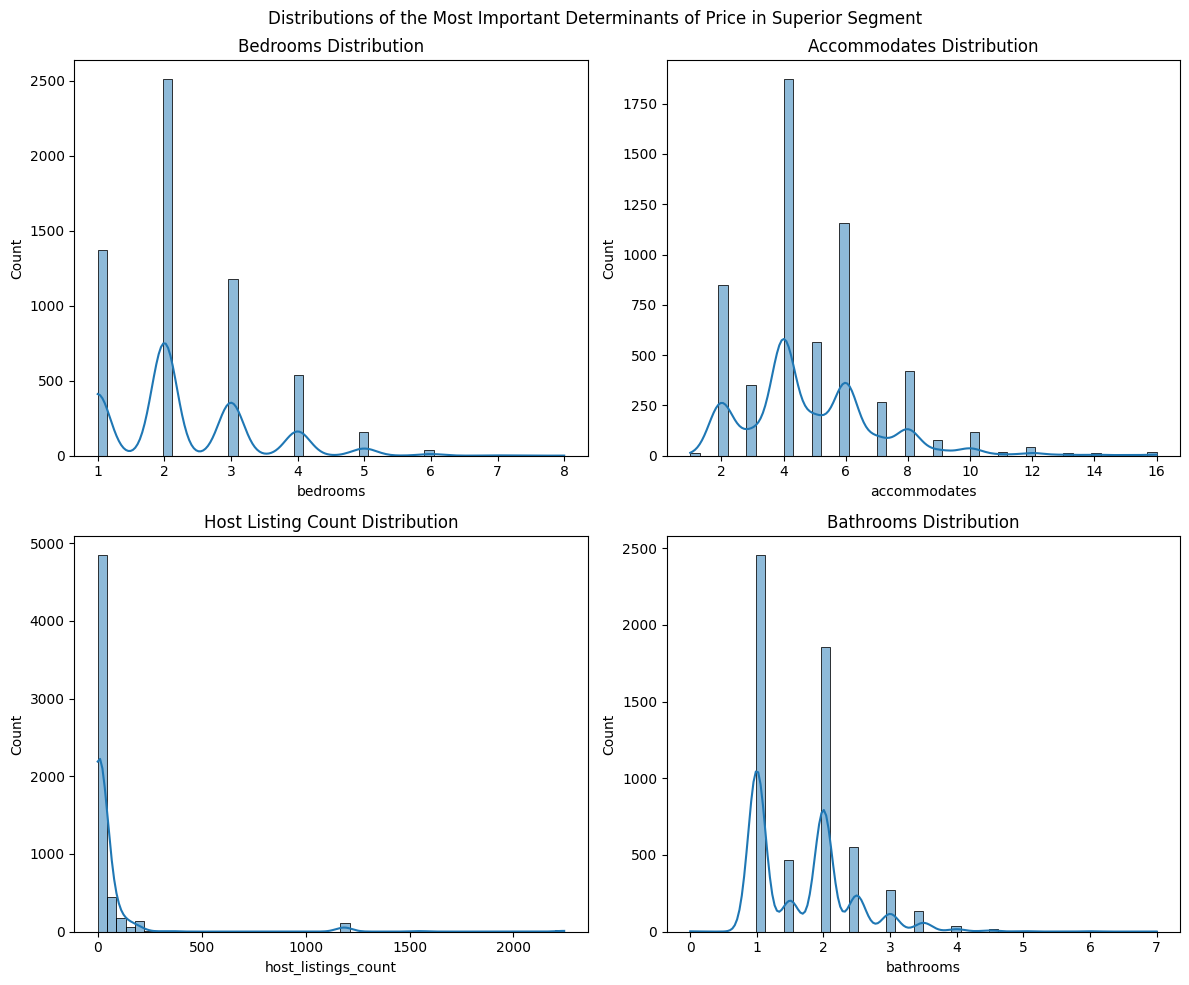

In [104]:
# apply the analyze_and_plot_segment_specific_data function to luxury_2021
analyze_and_plot_segment_specific_data(luxury_2022)

      host_listings_count   latitude  longitude  accommodates   bedrooms  \
mean           277.675250  51.506189  -0.152302      5.818884   2.847210   
min              0.000000  51.377280  -0.475010      1.000000   1.000000   
max           3750.000000  51.660000   0.248140     16.000000  22.000000   
std            492.796199   0.031192   0.064643      2.765825   1.376983   

           beds  minimum_nights  availability_30  availability_60  \
mean   3.327039        5.972818         8.812017        22.664950   
min    1.000000        1.000000         0.000000         0.000000   
max   38.000000     1124.000000        30.000000        60.000000   
std    2.093834       25.949228        10.599617        22.957582   

      availability_90  availability_365  number_of_reviews  \
mean        37.145064        144.060372           7.909585   
min          0.000000          0.000000           0.000000   
max         90.000000        365.000000         287.000000   
std         36.148431    

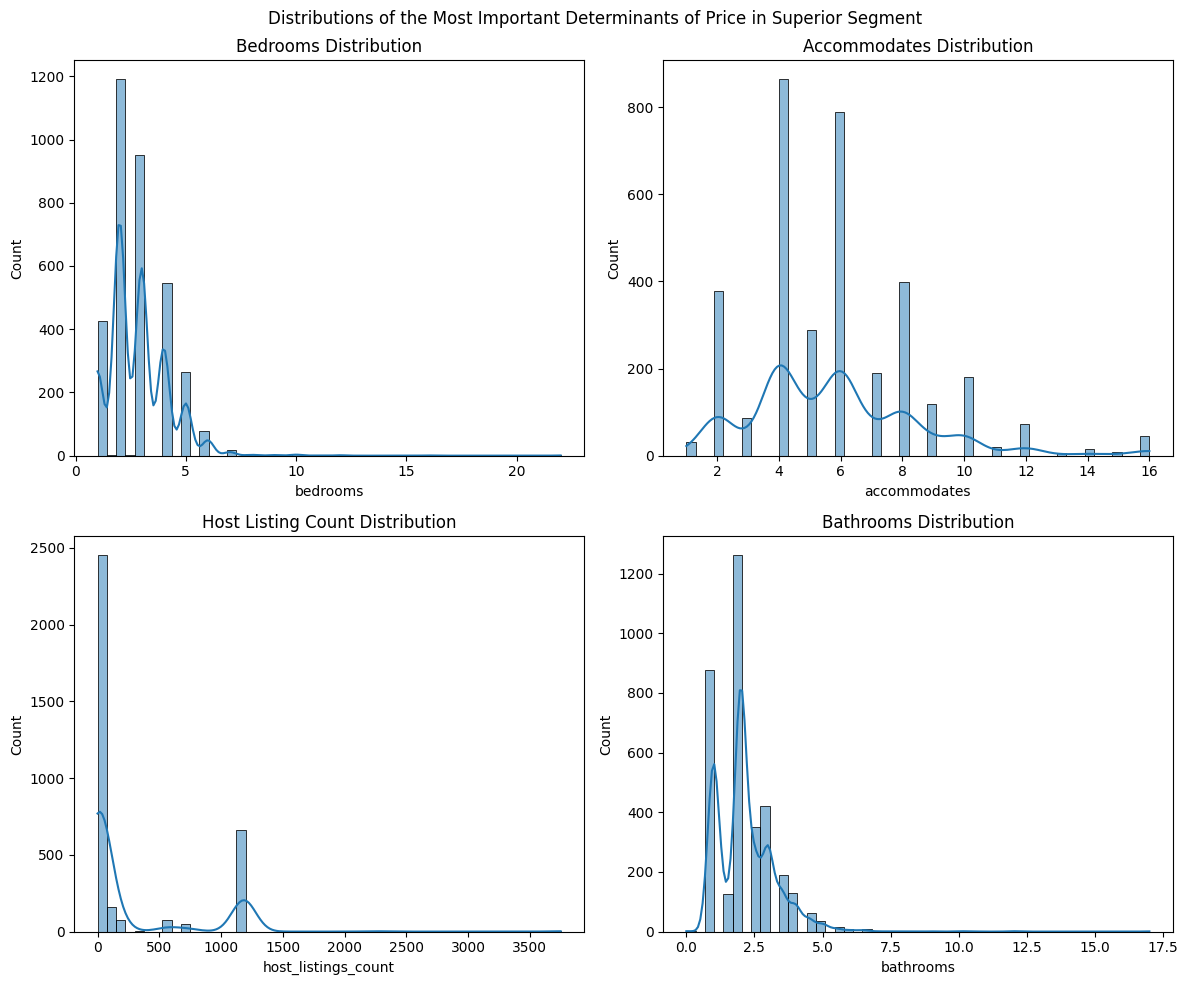

: 

In [105]:
# apply the analyze_and_plot_segment_specific_data function to superior_2021
analyze_and_plot_segment_specific_data(superior_2022)